In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
maze = np.array([[0, 0, 1, 0, 2, 0],
                 [0, 0, 1, 0, 0, 0],
                 [1, 1, 1, 0, 0, 0],
                 [1, 0, 1, 1, 1, 0],
                 [1, 0, 0, 0, 0, 0],
                 [1, 0, 1, 0, 1, 0],
                 [3, 1, 1, 0, 1, 0],
                 [0, 0, 0, 0, 0, 0]])

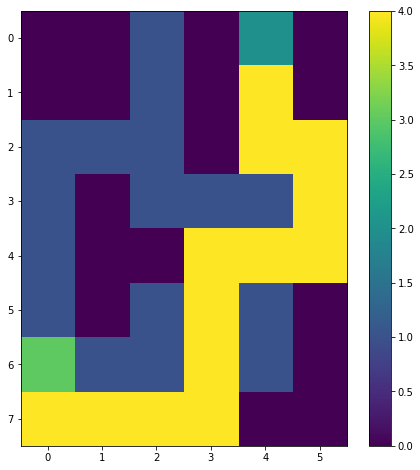

In [43]:
def find_path(maze):

    k=3
    start = np.argwhere(maze==3)
    end = np.argwhere(maze==2)
    i,j = start[0]
    m,n = end[0]
    maze[m][n] = 0

    def make_step(k): 
        for i in range(len(maze)):
            for j in range(len(maze[i])):
                if maze[i][j] == k:
                    if i>0 and maze[i-1][j] == 0:
                        maze[i-1][j] = k + 1
                    if j>0 and maze[i][j-1] == 0:
                        maze[i][j-1] = k + 1
                    if i<len(maze)-1 and maze[i+1][j] == 0:
                        maze[i+1][j] = k + 1
                    if j<len(maze[i])-1 and maze[i][j+1] == 0:
                        maze[i][j+1] = k + 1

    while True:
        if maze[m][n] == 0:
            make_step(k)
            k += 1
        elif maze[m][n] != 0:
            break

    k = maze[m][n]
    the_path = [(m,n)]
    while k > 3:
        if m > 0 and maze[m - 1][n] == k-1:
            m, n = m-1, n
            the_path.append((m, n))
            k-=1
        elif n > 0 and maze[m][n - 1] == k-1:
            m, n = m, n-1
            the_path.append((m, n))
            k-=1
        elif m < len(maze) - 1 and maze[m + 1][n] == k-1:
            m, n = m+1, n
            the_path.append((m, n))
            k-=1
        elif n < len(maze[m]) - 1 and maze[m][n + 1] == k-1:
            m, n = m, n+1
            the_path.append((m, n))
            k-=1

    for i in range(len(the_path)):
        maze[the_path[i]] = 5

    for i in range(len(maze)):
        for j in range(len(maze[i])):
            if maze[i][j] > 5:
                maze[i][j] = 0
    
    i,j = start[0]
    maze[i][j] = 3
    i,j = end[0]
    maze[i][j] = 2

    maze_with_path = maze

    return maze_with_path

maze_with_path = find_path(maze)

plt.figure(figsize=(8, 8))
plt.imshow(maze_with_path)
plt.clim(0, 4)
plt.colorbar()